In [1]:
import sys
sys.path.append('../')

import glob
import copy
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

from infer import InferenceWrapper

### Load the model

In [2]:
args_dict = {
    'project_dir': '../',
    'init_experiment_dir': '../runs/vc2-hq_adrianb_paper_main',
    'init_networks': 'identity_embedder, texture_generator, keypoints_embedder, inference_generator',
    'init_which_epoch': '2225',
    'num_gpus': 1,
    'experiment_name': 'vc2-hq_adrianb_paper_enhancer',
    'which_epoch': '1225',
    'spn_networks': 'identity_embedder, texture_generator, keypoints_embedder, inference_generator, texture_enhancer',
    'enh_apply_masks': False,
    'inf_apply_masks': False}

In [3]:
module = InferenceWrapper(args_dict)

Constructing DeepLabv3+ model...
Number of classes: 20
Output stride: 16
Number of Input Channels: 3
unexpected key "source_graph_2_fea.node_fea_for_res" in state_dict
unexpected key "source_graph_2_fea.node_fea_for_hidden" in state_dict
unexpected key "source_graph_2_fea.weight" in state_dict
unexpected key "source_skip_conv.0.weight" in state_dict
unexpected key "source_skip_conv.0.bias" in state_dict
unexpected key "source_semantic.weight" in state_dict
unexpected key "source_semantic.bias" in state_dict
unexpected key "middle_semantic.weight" in state_dict
unexpected key "middle_semantic.bias" in state_dict
unexpected key "middle_source_featuremap_2_graph.pre_fea" in state_dict
unexpected key "middle_source_featuremap_2_graph.weight" in state_dict
unexpected key "middle_source_graph_conv1.weight" in state_dict
unexpected key "middle_source_graph_conv2.weight" in state_dict
unexpected key "middle_source_graph_conv3.weight" in state_dict
unexpected key "middle_source_graph_2_fea.node

### Calculate poses, segmentation and do the inference

In [4]:
input_data_dict = {
    'source_imgs': np.asarray(Image.open('images/Jesse_Sr.jpg')), # H x W x 3
    'target_imgs': np.asarray(Image.open('images/source2.jpg'))[None]} # B x H x W x # 3

output_data_dict = module(input_data_dict)

c:\users\saad.lakes\anaconda3\envs\l2p\lib\site-packages\torch\nn\functional.py:2952: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
c:\users\saad.lakes\anaconda3\envs\l2p\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


In [5]:
import matplotlib.pyplot as plt
def to_image(img_tensor, seg_tensor=None):
    img_array = ((img_tensor.clamp(-1, 1).cpu().numpy() + 1) / 2).transpose(1, 2, 0) * 255
    
    if seg_tensor is not None:
        seg_array = seg_tensor.cpu().numpy().transpose(1, 2, 0)
#         print(seg_array.shape)
        
        img_array = img_array * seg_array + 255. * (1 - seg_array)

    return Image.fromarray(img_array.astype('uint8'))

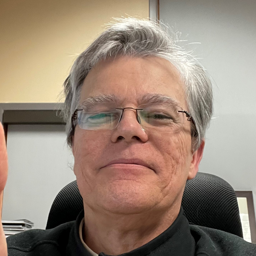

In [6]:
source_img = to_image(output_data_dict['source_imgs'][0, 0])
source_img

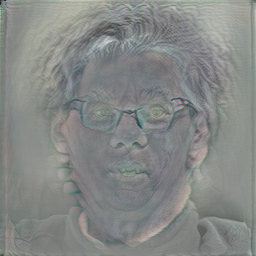

In [7]:
hf_texture = to_image(output_data_dict['pred_enh_tex_hf_rgbs'][0, 0])
hf_texture

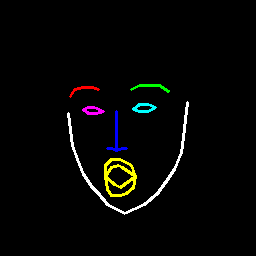

In [8]:
target_pose = to_image(output_data_dict['target_stickmen'][0, 0])
target_pose

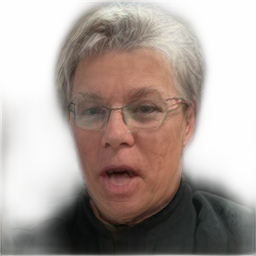

In [9]:
pred_img = to_image(output_data_dict['pred_enh_target_imgs'][0, 0], output_data_dict['pred_target_segs'][0, 0])
pred_img

In [45]:
x.shape

(256, 256, 1)

In [51]:
output_data_dict.keys()

dict_keys(['source_imgs', 'source_poses', 'target_poses', 'target_imgs', 'source_segs', 'target_segs', 'source_stickmen', 'target_stickmen', 'source_idt_embeds', 'pred_tex_hf_rgbs', 'target_pose_embeds', 'source_pose_embeds', 'pred_target_imgs', 'pred_target_segs', 'pred_target_uvs', 'pred_target_delta_lf_rgbs', 'pred_target_delta_hf_rgbs', 'pred_source_uvs', 'pred_source_delta_lf_rgbs', 'pred_source_segs', 'pred_enh_tex_hf_rgbs', 'pred_enh_target_imgs', 'pred_enh_target_delta_hf_rgbs'])

In [124]:
var ='pred_enh_target_imgs'
print(output_data_dict[var].cpu().numpy().shape)
simage = output_data_dict[var][0,0].cpu().permute(1,2,0).numpy()
import cv2
simage1 = cv2.cvtColor(simage,cv2.COLOR_BGR2RGB)
simage2=cv2.normalize(simage1, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

(1, 1, 3, 256, 256)


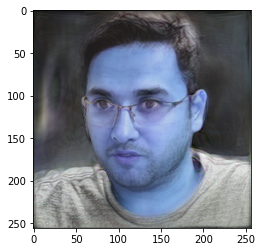

In [125]:
plt.imshow(simage2.astype(np.uint8))

In [110]:
simage2

array([[[ 30.92682  ,  38.984314 ,  28.250763 ],
        [ 31.174093 ,  30.715477 ,  32.121895 ],
        [ 30.067146 ,  29.816048 ,  30.707127 ],
        ...,
        [ 33.02067  ,  32.52358  ,  33.628765 ],
        [ 25.030096 ,  24.636965 ,  24.910936 ],
        [ 43.665306 ,  44.519897 ,  45.944355 ]],

       [[ 49.937378 ,  47.533276 ,  46.33655  ],
        [ 10.914805 ,   3.0091267,   1.9437264],
        [ 28.3187   ,  28.257622 ,  28.700575 ],
        ...,
        [ 53.848248 ,  49.807205 ,  49.147312 ],
        [ 39.291496 ,  40.769375 ,  37.079575 ],
        [ 33.12745  ,  32.676735 ,  33.787086 ]],

       [[ 44.166943 ,  33.006634 ,  30.033451 ],
        [ 40.40472  ,  37.741302 ,  19.064875 ],
        [ 46.562195 ,  36.690495 ,  34.071384 ],
        ...,
        [ 50.653168 ,  46.510365 ,  49.48263  ],
        [ 37.18368  ,  35.368736 ,  32.120335 ],
        [ 10.653452 ,  14.49234  ,  20.103033 ]],

       ...,

       [[104.260124 , 110.370865 , 108.5759   ],
        [ 7